# Boat Sales Data Exploration 

## Table of Contents

### 1. Importing Data & Libraries

### 2. Explor Data & Descriptive Analysis

### 3. Data Wrangling

### 4. Data Consistancy check
#### Mixed-type Data
#### Missing Values
#### Duplicate values

### 6. Export the Dataframe

## 01. Importing Data & Libraries

In [1]:
# Importing Libraries

import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Definig path
path = r'/Users/Ayaz/Desktop/Boat Sales Analysis'

In [3]:
# Import dataframe
df_boats = pd.read_csv(os.path.join(path, '02 Data','Original Data', 'boat_data.csv'), index_col = False)

## 02. Explore Data & Descriptive Analysis
#### Perform basic descriptive statistical operation and Exploring Data to draw early insights.

In [4]:
df_boats.head()
# The Price column need to be split into price and currency type.
# Location column need to be split to comprihance batter.
# There are Nan values which need to be check. 

,Price,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Number of views last 7 days
0,CHF 3337,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.00,1.90,NaN,Switzerland Â» Lake Geneva Â» VÃ©senaz,226
1,EUR 3490,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,Germany Â» BÃ¶nningstedt,75
2,CHF 3770,Sport Boat,Marine power boats,new boat from stock,0,3.69,1.42,Aluminium,Switzerland Â» Lake of Zurich Â» StÃ¤fa ZH,124
3,DKK 25900,Sport Boat,Pioner power boats,new boat from stock,2020,3.00,1.00,NaN,Denmark Â» Svendborg,64
4,EUR 3399,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,Germany Â» Bayern Â» MÃ¼nchen,58


In [5]:
df_boats.shape

(9888, 10)

In [6]:
df_boats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9888 entries, 0 to 9887
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Price                        9888 non-null   object 
 1   Boat Type                    9888 non-null   object 
 2   Manufacturer                 8550 non-null   object 
 3   Type                         9882 non-null   object 
 4   Year Built                   9888 non-null   int64  
 5   Length                       9879 non-null   float64
 6   Width                        9832 non-null   float64
 7   Material                     8139 non-null   object 
 8   Location                     9852 non-null   object 
 9   Number of views last 7 days  9888 non-null   int64  
dtypes: float64(2), int64(2), object(6)
memory usage: 772.6+ KB


In [7]:
df_boats.describe()

,Year Built,Length,Width,Number of views last 7 days
count,9888.000000,9879.000000,9832.000000,9888.000000
mean,1893.192860,11.570017,3.520124,149.160801
std,460.201582,6.002820,1.220534,151.819752
min,0.000000,1.040000,0.010000,13.000000
25%,1996.000000,7.470000,2.540000,70.000000
50%,2007.000000,10.280000,3.330000,108.000000
75%,2017.000000,13.930000,4.250000,172.000000
max,2021.000000,100.000000,25.160000,3263.000000


## 03. Data Wrangling

In [8]:
# Split the Price to 'Currency','Price' 
df_boats[['Currency','Price']]= df_boats['Price'].str.split(' ', 1, expand = True)
df_boats.head()

/var/folders/44/7xyg5dc91nb96tdj20w49k0r0000gp/T/ipykernel_33631/3783833613.py:2: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df_boats[['Currency','Price']]= df_boats['Price'].str.split(' ', 1, expand = True)


,Price,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Number of views last 7 days,Currency
0,3337,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.00,1.90,NaN,Switzerland Â» Lake Geneva Â» VÃ©senaz,226,CHF
1,3490,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,Germany Â» BÃ¶nningstedt,75,EUR
2,3770,Sport Boat,Marine power boats,new boat from stock,0,3.69,1.42,Aluminium,Switzerland Â» Lake of Zurich Â» StÃ¤fa ZH,124,CHF
3,25900,Sport Boat,Pioner power boats,new boat from stock,2020,3.00,1.00,NaN,Denmark Â» Svendborg,64,DKK
4,3399,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,Germany Â» Bayern Â» MÃ¼nchen,58,EUR


In [10]:
# Check the count of the string split.
df_boats['Currency'].value_counts()

EUR    8430
CHF     980
Â£      298
DKK     180
Name: Currency, dtype: int64

In [13]:
# Create the third column where all prices in Euro.
# 1. Create a new function europrice
# 2. Apply this function
def eurprice(Price,Currency):
    if Currency == 'EUR':
        return Price
    elif Currency == 'CHF':
        return int(Price) * 1.04
    elif Currency == 'DKK':
        return int(Price) * 0.13
    elif Currency == 'Â£':
        return int(Price) * 1.16 
    
df_boats['EUR_price'] = df_boats.apply(lambda x: eurprice(x.Price, x.Currency), axis=1)

In [14]:
df_boats.head()

,Price,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Number of views last 7 days,Currency,EUR_price
0,3337,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.00,1.90,NaN,Switzerland Â» Lake Geneva Â» VÃ©senaz,226,CHF,3470.48
1,3490,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,Germany Â» BÃ¶nningstedt,75,EUR,3490
2,3770,Sport Boat,Marine power boats,new boat from stock,0,3.69,1.42,Aluminium,Switzerland Â» Lake of Zurich Â» StÃ¤fa ZH,124,CHF,3920.8
3,25900,Sport Boat,Pioner power boats,new boat from stock,2020,3.00,1.00,NaN,Denmark Â» Svendborg,64,DKK,3367.0
4,3399,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,Germany Â» Bayern Â» MÃ¼nchen,58,EUR,3399


In [15]:
#Split Location into 3 Columns 'Country ,'City',and 'Region'

df_boats[['Country','City']] = df_boats['Location'].str.split('Â»', 1, expand = True)

df_boats[['City','Other']] = df_boats['City'].str.split('Â»', 1, expand = True)

df_boats['City'] = df_boats['City'].str.replace('¶','', regex = True)

df_boats['City'] = df_boats['City'].str.replace('Ã','', regex = True)

df_boats.head()

/var/folders/44/7xyg5dc91nb96tdj20w49k0r0000gp/T/ipykernel_33631/1557510899.py:3: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df_boats[['Country','City']] = df_boats['Location'].str.split('Â»', 1, expand = True)
/var/folders/44/7xyg5dc91nb96tdj20w49k0r0000gp/T/ipykernel_33631/1557510899.py:5: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df_boats[['City','Other']] = df_boats['City'].str.split('Â»', 1, expand = True)


,Price,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Number of views last 7 days,Currency,EUR_price,Country,City,Other
0,3337,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.00,1.90,NaN,Switzerland Â» Lake Geneva Â» VÃ©senaz,226,CHF,3470.48,Switzerland,Lake Geneva,VÃ©senaz
1,3490,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,Germany Â» BÃ¶nningstedt,75,EUR,3490,Germany,Bnningstedt,None
2,3770,Sport Boat,Marine power boats,new boat from stock,0,3.69,1.42,Aluminium,Switzerland Â» Lake of Zurich Â» StÃ¤fa ZH,124,CHF,3920.8,Switzerland,Lake of Zurich,StÃ¤fa ZH
3,25900,Sport Boat,Pioner power boats,new boat from stock,2020,3.00,1.00,NaN,Denmark Â» Svendborg,64,DKK,3367.0,Denmark,Svendborg,None
4,3399,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,Germany Â» Bayern Â» MÃ¼nchen,58,EUR,3399,Germany,Bayern,MÃ¼nchen


In [16]:
# Dropping unnecessery columns "Location", "Currency", "Price", and "Other"
df_boats = df_boats.drop(['Location','Currency','Price','Other'], axis = 1)
df_boats.head()

,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Number of views last 7 days,EUR_price,Country,City
0,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.00,1.90,NaN,226,3470.48,Switzerland,Lake Geneva
1,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,75,3490,Germany,Bnningstedt
2,Sport Boat,Marine power boats,new boat from stock,0,3.69,1.42,Aluminium,124,3920.8,Switzerland,Lake of Zurich
3,Sport Boat,Pioner power boats,new boat from stock,2020,3.00,1.00,NaN,64,3367.0,Denmark,Svendborg
4,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,58,3399,Germany,Bayern


## 04. Data Consistency Check

### Mixed-Type Data

In [17]:
#1. Checking Data for inconsistencies - Mixed data types
for col in df_boats.columns.tolist():
  weird = (df_boats[[col]].applymap(type) != df_boats[[col]].iloc[0].apply(type)).any(axis = 1)
  if len (df_boats[weird]) > 0:
    print (col)

Manufacturer
Type
Material
EUR_price
Country
City


In [19]:
# Changed mixed data types 
df_boats['Manufacturer'] = df_boats['Manufacturer'].astype('str')
df_boats['Type'] = df_boats['Type'].astype('str')
df_boats['Material'] = df_boats['Material'].astype('str')
df_boats['EUR_price'] = df_boats['EUR_price'].astype('float')
df_boats['Country'] = df_boats['Country'].astype('str')
df_boats['City'] = df_boats['City'].astype('str')

## Missing Values
### Finding missing Values

In [20]:
# Finding missing values in "df_boats" dataframe.
df_boats.isnull().sum()

Boat Type                       0
Manufacturer                    0
Type                            0
Year Built                      0
Length                          9
Width                          56
Material                        0
Number of views last 7 days     0
EUR_price                       0
Country                         0
City                            0
dtype: int64

### Addressing Missing Values

/var/folders/44/7xyg5dc91nb96tdj20w49k0r0000gp/T/ipykernel_33631/4269167508.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_boats.Length)
/var/folders/44/7xyg5dc91nb96tdj20w49k0r0000gp/T/ipykernel_33631/4269167508.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_boats.Width)


Text(0.5, 1.0, 'Width Distribution')

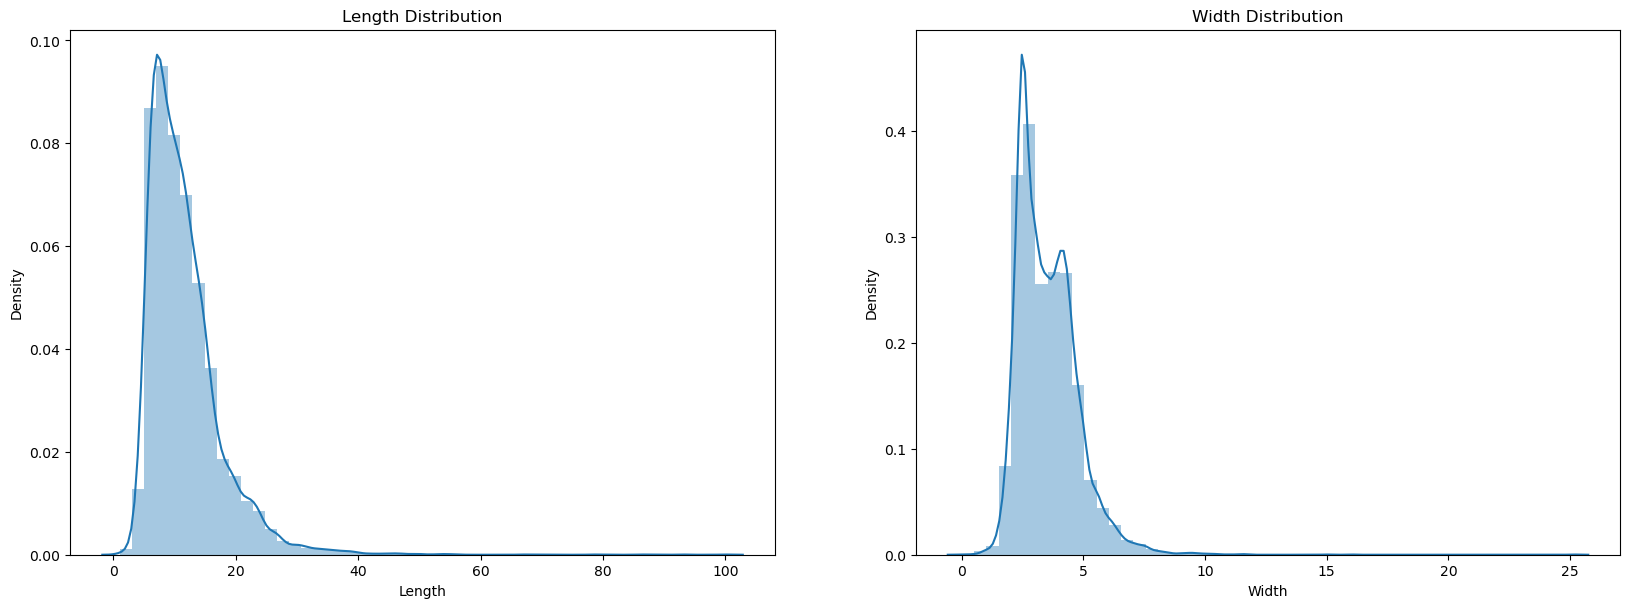

In [22]:
# Checking the distribution of the "Lenght" and "Width" columns. 
fig = plt.figure(figsize=(20,15) )
ax1 = fig.add_subplot(223)
sns.distplot(df_boats.Length)
ax1.set_title("Length Distribution")
ax2 = fig.add_subplot(224)
sns.distplot(df_boats.Width)
ax2.set_title("Width Distribution")

In [23]:
# Replace the missing values with a median as the data is skewed to the right. 
df_boats['Width'].fillna(df_boats['Width'].median(),inplace=True)
df_boats['Length'].fillna(df_boats['Length'].median(),inplace=True)
df_boats.isnull().sum()

Boat Type                      0
Manufacturer                   0
Type                           0
Year Built                     0
Length                         0
Width                          0
Material                       0
Number of views last 7 days    0
EUR_price                      0
Country                        0
City                           0
dtype: int64

## Duplicate values
### Finding duplicates

In [25]:
# Creating new subset of "df_boats" dataframe as "df_boats_dups" to check duplicate values. 
df_dups = df_boats[df_boats.duplicated()]
df_dups
# No duplicates found.

,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Number of views last 7 days,EUR_price,Country,City


In [26]:
# Checking "df_boats" datafram shape after Cleaning.
df_boats.shape

(9888, 11)

In [27]:
# Checking "df_boats" dataframe data type and data info.
df_boats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9888 entries, 0 to 9887
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Boat Type                    9888 non-null   object 
 1   Manufacturer                 9888 non-null   object 
 2   Type                         9888 non-null   object 
 3   Year Built                   9888 non-null   int64  
 4   Length                       9888 non-null   float64
 5   Width                        9888 non-null   float64
 6   Material                     9888 non-null   object 
 7   Number of views last 7 days  9888 non-null   int64  
 8   EUR_price                    9888 non-null   float64
 9   Country                      9888 non-null   object 
 10  City                         9888 non-null   object 
dtypes: float64(3), int64(2), object(6)
memory usage: 849.9+ KB


In [28]:
df_boats.head(10)

,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Number of views last 7 days,EUR_price,Country,City
0,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.00,1.90,nan,226,3470.48,Switzerland,Lake Geneva
1,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,75,3490.00,Germany,Bnningstedt
2,Sport Boat,Marine power boats,new boat from stock,0,3.69,1.42,Aluminium,124,3920.80,Switzerland,Lake of Zurich
3,Sport Boat,Pioner power boats,new boat from stock,2020,3.00,1.00,nan,64,3367.00,Denmark,Svendborg
4,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,58,3399.00,Germany,Bayern
5,Sport Boat,Linder power boats,new boat from stock,0,4.03,1.56,Aluminium,132,3796.00,Switzerland,Lake Constance
6,Catamaran,nan,"Used boat,Unleaded",1999,6.20,2.38,Aluminium,474,3744.00,Switzerland,Neuenburgersee
7,Sport Boat,nan,Used boat,0,3.00,3.33,nan,134,3224.00,Denmark,Svendborg
8,Fishing Boat,Crescent power boats,new boat from stock,2019,3.64,1.37,nan,45,3333.00,Germany,Bayern
9,Pontoon Boat,Whaly power boats,new boat from stock,2018,4.35,1.73,nan,180,3300.00,Italy,Dormelletto


In [29]:
df_boats['Material'].value_counts()

GRP                    5484
nan                    1749
PVC                    1123
Steel                   939
Wood                    235
Aluminium               229
Plastic                  77
Carbon Fiber             30
Thermoplastic            15
Hypalon                   5
Reinforced concrete       1
Rubber                    1
Name: Material, dtype: int64

## 05. Exporting Dataframe

In [31]:
# Exporting "df_boats" dataframe as "df_boats_checked.csv"
df_boats.to_csv(os.path.join(path, '02 data', 'Prepared Data', 'df_boats_checked.csv'))

### When I checked the cleaned data, I discovered that there are still some missing values. I'll conduct some more data cleaning to look for missing values and treat them in the dataframe.

In [1]:
# importing Libraries

import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Definig the path
path = r'/Users/Ayaz/Desktop/Boat Sales Analysis'

In [4]:
# Importing cleaned data to recheck the consistancy.
df_boats = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'df_boats_checked.csv'), index_col = False)

In [5]:
# Checking for missing values
df_boats.isnull().sum()

Unnamed: 0                        0
Boat Type                         0
Manufacturer                   1338
Type                              6
Year Built                        0
Length                            0
Width                             0
Material                       1749
Number of views last 7 days       0
EUR_price                         0
Country                          36
City                             36
dtype: int64

In [6]:
# Filling missing values in 'Type' column with mode value.
df_boats['Type'].fillna(df_boats['Type'].value_counts().idxmax(),inplace=True)

The Manufacturer and Material columns have a large number of missing values; however, the remaining missing values are fewer than 1% of the total date set, thus they will be removed.
Imputing the 'Material' column with the most frequent material type (GRP) involves too many assumptions, which may skewed the final result in favour of the aforementioned material. As a result, the NaN values will be converted to 'none'.
The same may be said for the 'Manufacturer' column in the 'Material' column.
Furthermore, because the boat can be custom-made by a craftsman, filling out the manufacturer would be problematic, thus the NaNs will be converted to 'none' as well.
If these columns prove to be useful in predicting views, the stakeholder might emphasise this when users fill out the survey when listing the boat for sale on the website.

In [7]:
# Replace NaNs with 'none' in Manufacturer and Material columns, drop the rest
df_boats[['Manufacturer', 'Material']] = df_boats[['Manufacturer', 'Material']].fillna(value='none')
df_boats = df_boats.dropna()

In [8]:
# Drop missing values from the 'Country' and 'City' columns
df_boats.dropna(subset=['Country', 'City'], inplace=True)

In [10]:
df_boats.isnull().sum()

Unnamed: 0                     0
Boat Type                      0
Manufacturer                   0
Type                           0
Year Built                     0
Length                         0
Width                          0
Material                       0
Number of views last 7 days    0
EUR_price                      0
Country                        0
City                           0
dtype: int64

In [11]:
df_boats.head(10)

,Unnamed: 0,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Number of views last 7 days,EUR_price,Country,City
0,0,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.00,1.90,none,226,3470.48,Switzerland,Lake Geneva
1,1,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,75,3490.00,Germany,Bnningstedt
2,2,Sport Boat,Marine power boats,new boat from stock,0,3.69,1.42,Aluminium,124,3920.80,Switzerland,Lake of Zurich
3,3,Sport Boat,Pioner power boats,new boat from stock,2020,3.00,1.00,none,64,3367.00,Denmark,Svendborg
4,4,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,58,3399.00,Germany,Bayern
5,5,Sport Boat,Linder power boats,new boat from stock,0,4.03,1.56,Aluminium,132,3796.00,Switzerland,Lake Constance
6,6,Catamaran,none,"Used boat,Unleaded",1999,6.20,2.38,Aluminium,474,3744.00,Switzerland,Neuenburgersee
7,7,Sport Boat,none,Used boat,0,3.00,3.33,none,134,3224.00,Denmark,Svendborg
8,8,Fishing Boat,Crescent power boats,new boat from stock,2019,3.64,1.37,none,45,3333.00,Germany,Bayern
9,9,Pontoon Boat,Whaly power boats,new boat from stock,2018,4.35,1.73,none,180,3300.00,Italy,Dormelletto


In [12]:
df_boats['Year Built'].value_counts()

2020    1279
2019     663
0        551
2008     455
2006     392
        ... 
1914       1
1895       1
1885       1
1931       1
1900       1
Name: Year Built, Length: 122, dtype: int64

In [13]:
df_boats.shape

(9852, 12)

The column 'Year Built' has 5% values as '0' of the whole dataset, so rows in 'Year Built' with the value of '0' will be removed from the DataFrame.

In [14]:
# Drop rows where 'Year Built' is 0
df_boats = df_boats[df_boats['Year Built']!=0]

In [15]:
df_boats['Year Built'].value_counts()

2020    1279
2019     663
2008     455
2006     392
2007     390
        ... 
1914       1
1895       1
1885       1
1931       1
1900       1
Name: Year Built, Length: 121, dtype: int64

In [16]:
df_boats.shape

(9301, 12)

In [17]:
df_boats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9301 entries, 0 to 9887
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   9301 non-null   int64  
 1   Boat Type                    9301 non-null   object 
 2   Manufacturer                 9301 non-null   object 
 3   Type                         9301 non-null   object 
 4   Year Built                   9301 non-null   int64  
 5   Length                       9301 non-null   float64
 6   Width                        9301 non-null   float64
 7   Material                     9301 non-null   object 
 8   Number of views last 7 days  9301 non-null   int64  
 9   EUR_price                    9301 non-null   float64
 10  Country                      9301 non-null   object 
 11  City                         9301 non-null   object 
dtypes: float64(3), int64(3), object(6)
memory usage: 944.6+ KB


In [18]:
df_boats.isnull().sum()

Unnamed: 0                     0
Boat Type                      0
Manufacturer                   0
Type                           0
Year Built                     0
Length                         0
Width                          0
Material                       0
Number of views last 7 days    0
EUR_price                      0
Country                        0
City                           0
dtype: int64

In [19]:
df_boats = df_boats.drop('Unnamed: 0', axis=1)

In [20]:
df_boats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9301 entries, 0 to 9887
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Boat Type                    9301 non-null   object 
 1   Manufacturer                 9301 non-null   object 
 2   Type                         9301 non-null   object 
 3   Year Built                   9301 non-null   int64  
 4   Length                       9301 non-null   float64
 5   Width                        9301 non-null   float64
 6   Material                     9301 non-null   object 
 7   Number of views last 7 days  9301 non-null   int64  
 8   EUR_price                    9301 non-null   float64
 9   Country                      9301 non-null   object 
 10  City                         9301 non-null   object 
dtypes: float64(3), int64(2), object(6)
memory usage: 872.0+ KB


In [21]:
df_boats.head(10)

,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Number of views last 7 days,EUR_price,Country,City
0,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.00,1.90,none,226,3470.48,Switzerland,Lake Geneva
1,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,75,3490.00,Germany,Bnningstedt
3,Sport Boat,Pioner power boats,new boat from stock,2020,3.00,1.00,none,64,3367.00,Denmark,Svendborg
4,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,58,3399.00,Germany,Bayern
6,Catamaran,none,"Used boat,Unleaded",1999,6.20,2.38,Aluminium,474,3744.00,Switzerland,Neuenburgersee
8,Fishing Boat,Crescent power boats,new boat from stock,2019,3.64,1.37,none,45,3333.00,Germany,Bayern
9,Pontoon Boat,Whaly power boats,new boat from stock,2018,4.35,1.73,none,180,3300.00,Italy,Dormelletto
10,Fishing Boat,Terhi power boats,"Used boat,Electric",1987,4.35,1.75,GRP,239,3640.00,Switzerland,Seengen
12,Sport Boat,GS Nautica power boats,Used boat,2004,4.70,2.00,GRP,69,3500.00,Italy,Lake Garda
13,Runabout,Kimple power boats,new boat from stock,2020,4.40,1.65,Aluminium,113,4784.00,Switzerland,Zugersee


## Exporting Data

In [22]:
# Exporting "df_boats" dataframe as "df_boats_cleaned.csv"
df_boats.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'df_boats_cleaned.csv'))